<a href="https://colab.research.google.com/github/vishva2410/Salary_prediction_neural_network/blob/main/Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv('Salary.csv')
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


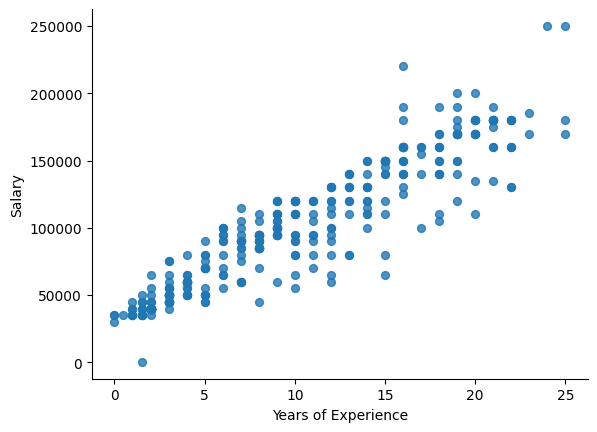

In [10]:
# @title Years of Experience vs Salary

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Years of Experience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
df.isnull().sum()
df.dtypes

,0
Age,float64
Gender,int64
Education Level,int64
Job Title,int64
Years of Experience,float64
Salary,float64


In [28]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # Use median to handle outliers
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)

<ipython-input-28-a35b080b0988>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Use median to handle outliers
<ipython-input-28-a35b080b0988>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [29]:
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)

<ipython-input-29-bb02ac3262c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)
<ipython-input-29-bb02ac3262c8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [30]:
df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)
df.isnull().sum()

<ipython-input-30-d76431788ba9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)


,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [31]:
sc = StandardScaler()
df = sc.fit_transform(df)

In [41]:
x = df[:, :-1]  # All columns except last one (features)
y = df[:, -1]   # Last column (target)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=32)

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])

In [48]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2147 - val_loss: 0.1123
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1287 - val_loss: 0.1172
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1255 - val_loss: 0.1116
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1828 - val_loss: 0.0981
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1266 - val_loss: 0.1111
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1128 - val_loss: 0.1099
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1400 - val_loss: 0.1087
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1275 - val_loss: 0.1334
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1222 - val_loss: 0.1100
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1326 - val_loss: 0.1012
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1513 - val_loss: 0.1019
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1278 - val_loss: 0.1247
E

In [49]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [47]:
mean_absolute_error = np.mean(np.abs(y_pred - y_test))
print("Mean Absolute Error:", mean_absolute_error)

Mean Absolute Error: 1.0103478851574947


In [59]:
loss, mae = model.evaluate(x_test, y_test)
print(f'Mean Absolute Error: {mae}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.2110 
Mean Absolute Error: 0.20711147785186768


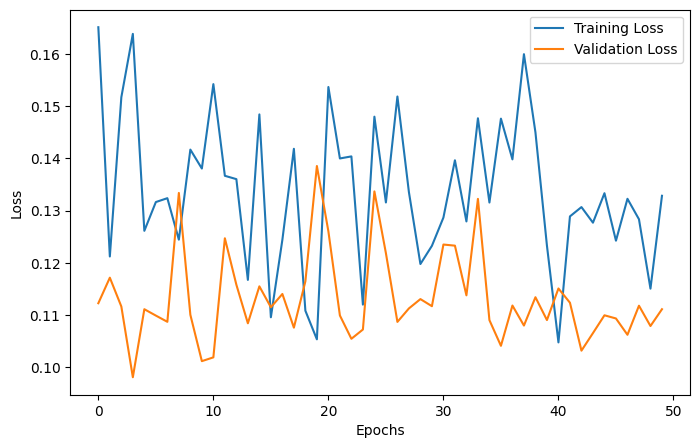

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


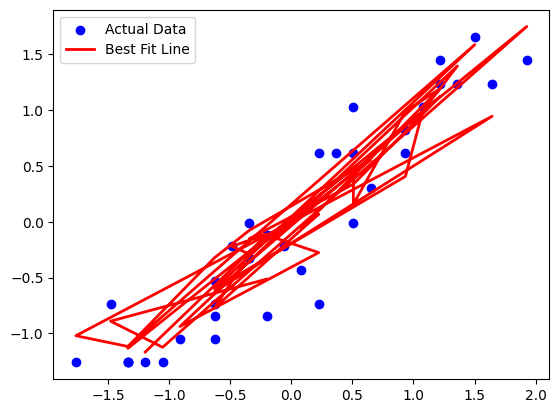

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.scatter(x_test[:, 0], y_test, color='blue', label='Actual Data')
y_pred = model.predict(x_test)
plt.plot(x_test[:, 0], y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


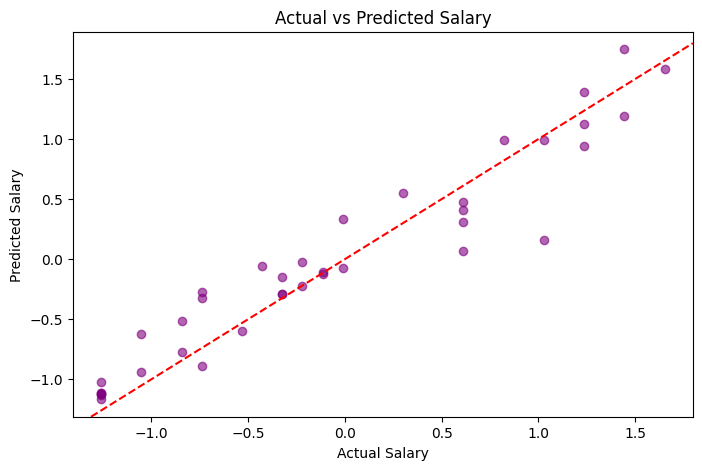

In [64]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, model.predict(x_test), color='purple', alpha=0.6)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.axline([0, 0], [1, 1], color='red', linestyle='--')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


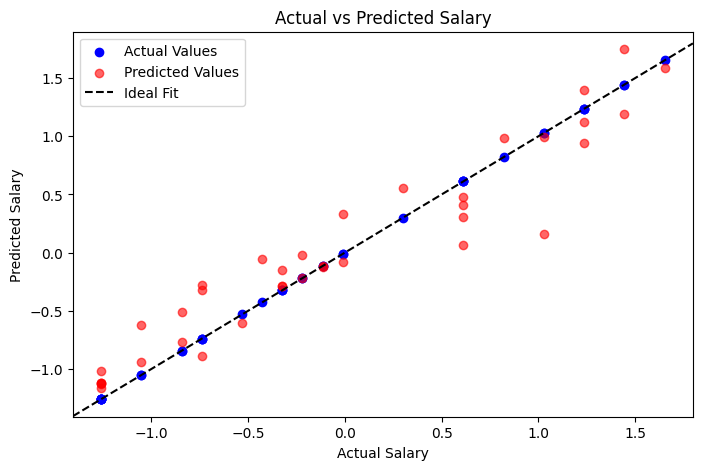

In [65]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test, color='blue', label='Actual Values')
plt.scatter(y_test, model.predict(x_test), color='red', alpha=0.6, label='Predicted Values')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.axline([0, 0], [1, 1], color='black', linestyle='--', label='Ideal Fit')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 


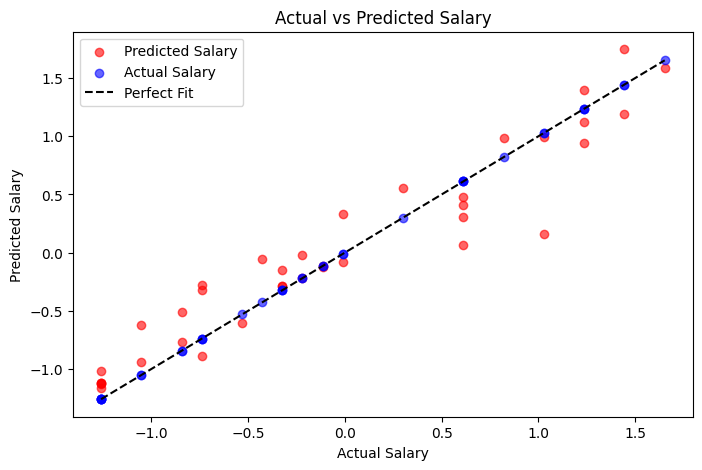

In [66]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, model.predict(x_test), color='red', alpha=0.6, label='Predicted Salary')
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label='Actual Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Perfect Fit')
plt.legend()
plt.show()